In [2]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.rc('font', family='NanumSquareRound')
matplotlib.rcParams['axes.unicode_minus'] = False

In [4]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("tunguz/online-retail")

print("Path to dataset files:", path)
df = pd.read_csv(path + '/' + os.listdir(path)[0], encoding='latin1')
df.shape

Path to dataset files: /home/drkail/.cache/kagglehub/datasets/tunguz/online-retail/versions/1


(541909, 8)

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
# 주문 가격
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


In [8]:
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

# 'InvoiceDate' 컬럼 이용하여 판매 월 추출
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

/tmp/ipykernel_67692/3844768752.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


## 1. 모집단과 표본 집단의 TotalPrice를 비교해 주세요.

* 데이터셋에서 무작위로 1000개의 표본을 추출하세요.
* 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교해주세요.  
* 중심극한정리를 사용해 모집단과 표본의 차이를 설명해주세요.

In [9]:
## 1000개 표본 추출

df_sample = df.sample(1000, replace=False, random_state=2025)
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 411342 to 248820
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   InvoiceNo     1000 non-null   object        
 1   StockCode     1000 non-null   object        
 2   Description   996 non-null    object        
 3   Quantity      1000 non-null   int64         
 4   InvoiceDate   1000 non-null   datetime64[ns]
 5   UnitPrice     1000 non-null   float64       
 6   CustomerID    733 non-null    float64       
 7   Country       1000 non-null   object        
 8   TotalPrice    1000 non-null   float64       
 9   DayOfWeek     1000 non-null   int32         
 10  InvoiceMonth  1000 non-null   int32         
dtypes: datetime64[ns](1), float64(3), int32(2), int64(1), object(4)
memory usage: 85.9+ KB


In [10]:
## TotalPrice의 평균, 표준편차 비교

print('전체 데이터셋의 평균:', df['TotalPrice'].mean() )
print('전체 데이터셋의 표준편차:', df['TotalPrice'].std() )
print('--------------------')
print('표본 데이터의 평균:', df_sample['TotalPrice'].mean() )
print('표본 데이터의 표준편차:', df_sample['TotalPrice'].std() )

전체 데이터셋의 평균: 17.987794876999644
전체 데이터셋의 표준편차: 378.8108235059747
--------------------
표본 데이터의 평균: 18.00321
표본 데이터의 표준편차: 43.63509340625356


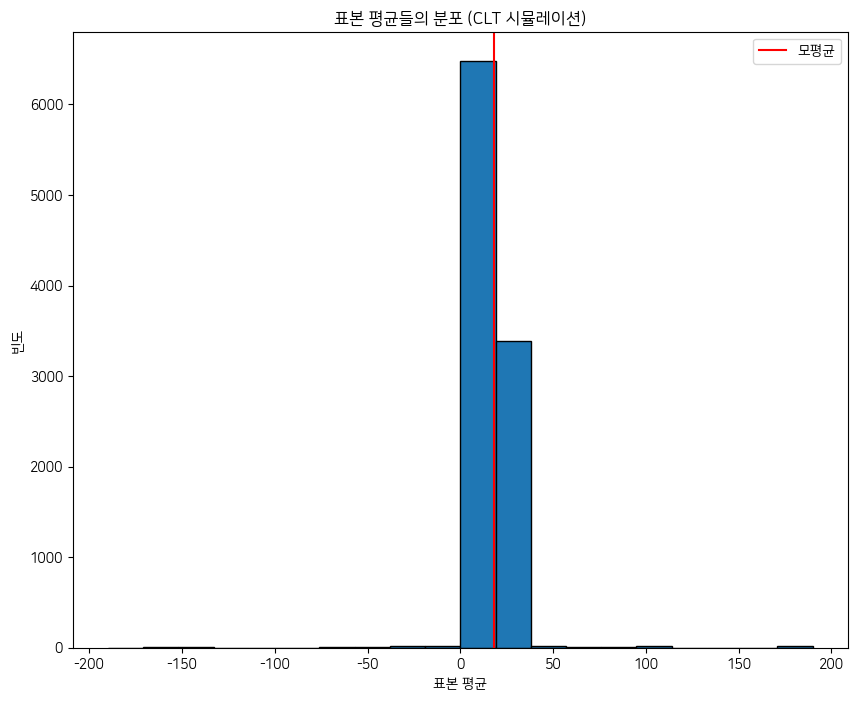

In [11]:
## 중심극한정리를 사용한 모집단과 표본의 차이

## 중심극한정리는 모집단의 분포가 어떤 모양이건, 표본 크기(n)가 충분히 크면 "표본 평균들의 분포"가 정규분포 모양에 가까워지는 것을 의미.
## 중심극한정리로 인해, 표본 평균이 모집단 평균값 주위에 정규분포 모양으로 퍼져있다는 것을 알 수 있고, 신뢰구간 같은 오차의 범위를 계산할 수 있다.

sample_means = []
for _ in range(10000):
    sample = df.sample(1000, random_state=None)
    sample_means.append( sample['TotalPrice'].mean() )

plt.figure(figsize=(10, 8))
plt.hist(sample_means, bins=20, edgecolor='black')
plt.title("표본 평균들의 분포 (CLT 시뮬레이션)")
plt.xlabel('표본 평균')
plt.ylabel('빈도')
plt.axvline(df['TotalPrice'].mean(), color='red', label='모평균')
plt.legend()
plt.show()

## 2. 주문이 가장 많은 상위 두 국가의 'TotalPrice' 평균에 차이가 있는지 검증하세요.

* 'Country' 변수를 바탕으로 주문이 가장 많은 상위 두 국가를 찾으세요.
* 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요.  
* t-통계량과 p-값을 해석하여 결과를 설명하고, 1종 오류와 2종 오류의 개념을 적용하여 설명해주세요.

- Country 변수를 바탕으로 주문이 가장 많은 상위 두 국가를 찾으시오.

In [12]:
df['Country'].value_counts()

## 첫번째 국가. United Kingdom
## 두번째 국가. Germany

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


- 독립표본 t-검정을 사용하여 두 국가간 TotalPrice 평균의 차이가 통계적으로 유의미한지 검증하시오.

In [13]:
## H0 : 두 국가의 TotalPrice 평균은 차이가 없다.
## H1 : 두 국가의 TotalPrice 평균은 차이가 있다.

In [14]:
from scipy import stats

In [15]:
## 국가별 TotalPrice 추출

totalPrice_uk = df[df['Country']=='United Kingdom']['TotalPrice']
totalPrice_ger = df[df['Country']=='Germany']['TotalPrice']

In [16]:
## UK의 표준편차 확인

totalPrice_uk.describe()[['std']]

std    394.839116
Name: TotalPrice, dtype: float64

In [17]:
## Germany의 표준편차 확인

totalPrice_ger.describe()[['std']]

std    37.324826
Name: TotalPrice, dtype: float64

In [18]:
t_stat, p_value = stats.ttest_ind(totalPrice_uk, totalPrice_ger, equal_var=False) ## 등분산성이 비슷하다고 보기 어렵기에 Welch's t-test 사용

print( f't-통계량: {t_stat:.4f}')
print( f'p-value: {p_value:.2f}' )

t-통계량: -10.0464
p-value: 0.00


- t-통계량과 p-값을 해석하여 결과를 설명하고, 1종 오류와 2종 오류의 개념을 적용하여 설명하시오.
    - 평균의 차이가 있다고 보아야 한다. t-통계량 상, Germany의 평균이 더 높다고 나왔고, p-값 역시 매우 작게 나왔기에 이 차이가 우연은 아닐 것이다라고 해석할 수 있음.
    - 여기서의 1종 오류는 두 국가 간 평균값 차이가 없는게 맞는데, 평균값 차이가 있다고 결론 내렸을 때 발생한다. 유의수준은 관습적으로 0.05로 설정한다. p-값이 0.000000... 으로 매우 작게 나왔지만, 그럼에도 우연히 평균값 차이가 있는 데이터로 검정을 한 것일 수도 있다. 그렇지만 전체 데이터로 t-검정을 수행한 것이니 1종 오류를 범하지 않았다고 생각한다.
    - 반대로 2종 오류는 두 국가 간 평균값 차이가 있는게 맞는데, 평균값 차이가 없다는 주장을 기각하지 못했을 때 발생한다.

## 3. 주중, 주말에 따라서 발생하는 UnitPrice의 분포가 달라지는지 확인하세요.

* 주중의 'UnitPrice'와 주말의 'UnitPrice'의 분포를 분석하기 위해 데이터의 중심경향치(평균, 중간값), 변산성(표준편차, 분산), 분위수를 계산하세요.  
* 상자수염그림과 히스토그램을 그려 시각화를 통해 분포를 확인하고 데이터의 분포에 대해 설명해주세요.

- 주중의 'UnitPrice'와 주말의 'UnitPrice'의 분포를 분석하기 위해 데이터의 중심경향치(평균, 중간값), 변산성(표준편차, 분산), 분위수를 계산하세요.  

In [27]:
## DayOfWeek 주중은 0 ~ 4, 주말은 5 ~ 6

weekday = df[ df['DayOfWeek'] < 5 ]
weekend = df[ df['DayOfWeek'] > 4 ]

In [ ]:
## 주중 데이터의 통계량

print(f'주중 데이터의 평균: {weekday['UnitPrice'].mean():.4f}')
print(f'주중 데이터의 중앙값: {weekday['UnitPrice'].median():.4f}')

print(f'주중 데이터의 분산: {weekday['UnitPrice'].var():.4f}')
print(f'주중 데이터의 표준편차: {weekday['UnitPrice'].std():.4f}')

print(f'주중 데이터의 1사분위수: {weekday['UnitPrice'].quantile(0.25):.4f}')
print(f'주중 데이터의 2사분위수: {weekday['UnitPrice'].quantile(0.50):.4f}')
print(f'주중 데이터의 3사분위수: {weekday['UnitPrice'].quantile(0.75):.4f}')

주중 데이터의 평균: 4.8434
주중 데이터의 중앙값: 2.1000
주중 데이터의 분산: 10615.6049
주중 데이터의 표준편차: 103.0321
주중 데이터의 1사분위수: 1.2500
주중 데이터의 2사분위수: 2.1000
주중 데이터의 3사분위수: 4.1300


In [35]:
## 주말 데이터의 통계량

print(f'주말 데이터의 평균: {weekend['UnitPrice'].mean():.4f}')
print(f'주말 데이터의 중앙값: {weekend['UnitPrice'].median():.4f}')

print(f'주말 데이터의 분산: {weekend['UnitPrice'].var():.4f}')
print(f'주말 데이터의 표준편차: {weekend['UnitPrice'].std():.4f}')

print(f'주말 데이터의 1사분위수: {weekend['UnitPrice'].quantile(0.25):.4f}')
print(f'주말 데이터의 2사분위수: {weekend['UnitPrice'].quantile(0.50):.4f}')
print(f'주말 데이터의 3사분위수: {weekend['UnitPrice'].quantile(0.75):.4f}')

주말 데이터의 평균: 2.8878
주말 데이터의 중앙값: 1.8500
주말 데이터의 분산: 63.3536
주말 데이터의 표준편차: 7.9595
주말 데이터의 1사분위수: 1.2500
주말 데이터의 2사분위수: 1.8500
주말 데이터의 3사분위수: 3.7500


- 상자수염그림과 히스토그램을 그려 시각화를 통해 분포를 확인하고 데이터의 분포에 대해 설명해주세요.
    - 주중 데이터에는 음수가 들어가있다. 그래서 주중 데이터와 주말 데이터의 그래프에 차이가 발생한다.
    - 박스플롯을 보면 대부분 평균, 사분위수 등이 모두 0 근처에 있다. 보다 세밀한 분포 형태를 보려면 박스플롯을 기준으로 이상치를 제거한 후 다시 그래프를 그려야 가능하다.

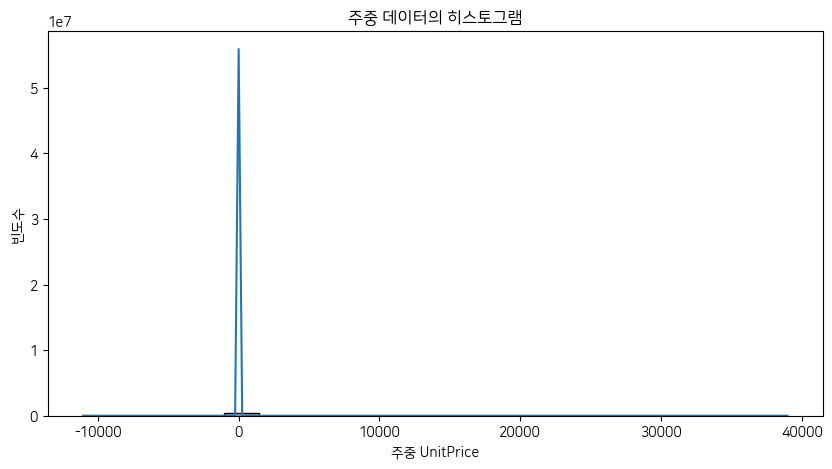

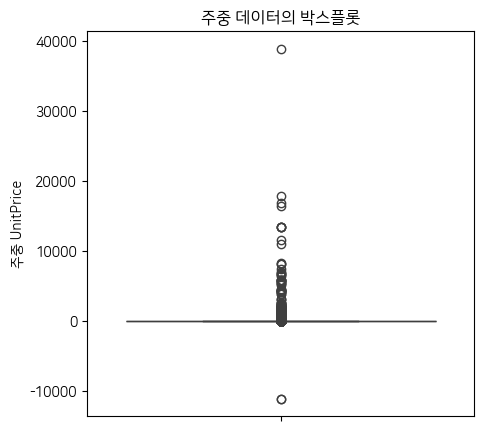

In [48]:
plt.figure(figsize=(10,5))
sns.histplot(weekday['UnitPrice'], bins=20, kde=True)
plt.title('주중 데이터의 히스토그램')
plt.xlabel('주중 UnitPrice')
plt.ylabel('빈도수')
plt.show()

plt.figure(figsize=(5,5))
sns.boxplot(weekday['UnitPrice'])
plt.title('주중 데이터의 박스플롯')
plt.ylabel('주중 UnitPrice')
plt.show()

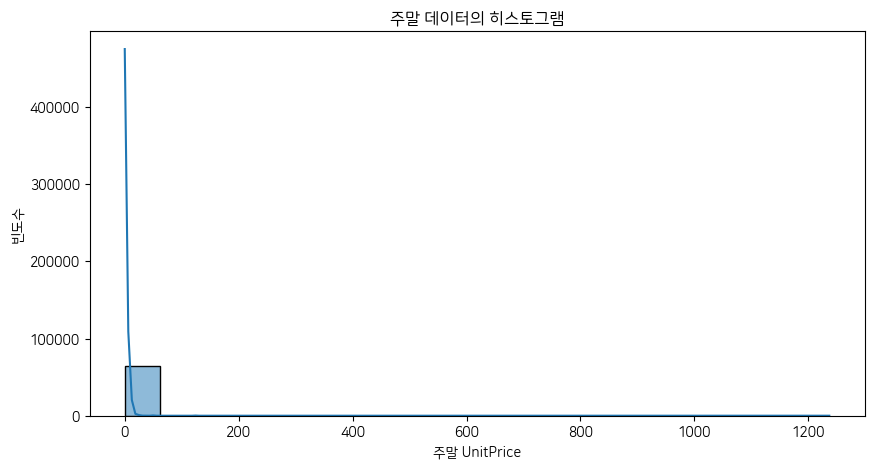

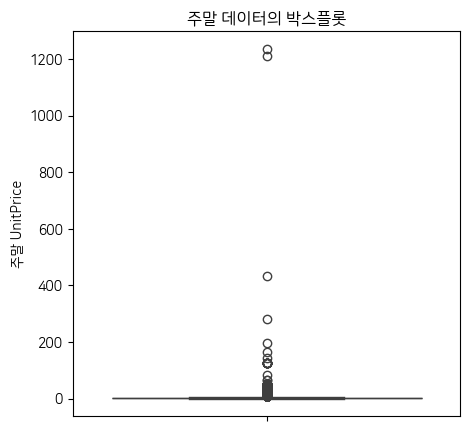

In [49]:
plt.figure(figsize=(10,5))
sns.histplot(weekend['UnitPrice'], bins=20, kde=True)
plt.title('주말 데이터의 히스토그램')
plt.xlabel('주말 UnitPrice')
plt.ylabel('빈도수')
plt.show()

plt.figure(figsize=(5,5))
sns.boxplot(weekend['UnitPrice'])
plt.title('주말 데이터의 박스플롯')
plt.ylabel('주말 UnitPrice')
plt.show()

## 4. 상품의 단가와 판매 국가, 판매 날짜을 이용해 판매 수량을 예측하는 회귀 모델을 만드세요.
* 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.  
* 변수를 다음과 같이 설정하여 다중 선형 회귀 분석을 진행하세요.
    * 종속변수: 판매 수량(`Quantity`)
    * 독립변수: 상품 단가(`UnitPrice`), 판매 국가(`Country`), 판매 요일(`DayOfWeek`), 판매 월( `InvoiceMonth`)   
* 회귀계수와 결정계수를 활용하여 회귀 분석 결과를 해석해주세요.

In [59]:
## 변수 선별
df_fix = df[['Quantity', 'UnitPrice', 'Country', 'DayOfWeek', 'InvoiceMonth']]

## 0 이하의 가격을 가진 행 제외
df_fix = df_fix[ df_fix['UnitPrice'] > 0 ]

## 국가, 요일, 월 더미변수화
df_fix = pd.get_dummies(df_fix, columns=['Country', 'DayOfWeek', 'InvoiceMonth'], drop_first=True, dtype=int)

## 인덱스 초기화
df_fix = df_fix.reset_index(drop=True)

## 독립변수, 종속변수 구분
x_lr, y_lr = df_fix.iloc[: , 1:], df_fix.iloc[:, 0]

In [ ]:
## 선형회귀 모델 불러오기 및 학습
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()

model_lr.fit(x_lr, y_lr)

In [ ]:
## 학습된 모델이 가지는 회귀계수
model_lr.coef_

array([-3.11926606e-03, -5.37262165e+01, -5.22708973e+01, -5.48527160e+01,
       -5.48740986e+01, -4.69760889e+01, -5.36719777e+01, -5.55658469e+01,
       -4.55712218e+01, -4.53497200e+01, -4.85934967e+01, -5.76786907e+01,
       -5.09564858e+01, -5.29676423e+01, -5.34793337e+01, -5.43644224e+01,
       -4.91396073e+01, -5.23030728e+01, -5.27429021e+01, -5.58112800e+01,
        4.95200918e+00, -5.71700161e+01, -4.39105564e+01, -5.88695542e+01,
        1.81961072e+01, -4.82000747e+01, -5.53549593e+01, -5.53298398e+01,
       -6.10346925e+01, -5.94714191e+01, -4.22080005e+01, -5.51446876e+01,
        1.16423997e+01, -5.08355912e+01, -6.21978682e+01, -5.23778538e+01,
       -5.67296784e+01, -5.92199046e+01,  7.23065892e-01,  1.47204552e+00,
        1.98836703e+00,  5.95901876e-01, -1.48727214e+00,  1.19522610e+00,
        1.38637024e+00,  1.64086490e+00,  1.88639303e+00,  1.18618534e+00,
        1.55357544e+00,  2.49348057e+00,  2.53191153e+00,  1.44156518e+00,
        5.20118176e-01,  

In [ ]:
## 특정 국가 여부는 일본, 스웨덴을 제외하면 수량에 마이너스 영향을 주고,
## 특정 요일, 특정 월의 여부는 수량 예측에 상대적으로 그 영향력이 낮다. -1 ~ 2 사이에 있다 대부분. 
pd.DataFrame(model_lr.coef_, index=x_lr.columns)

,0
UnitPrice,-0.003119
Country_Austria,-53.726216
Country_Bahrain,-52.270897
Country_Belgium,-54.852716
Country_Brazil,-54.874099
Country_Canada,-46.976089
Country_Channel Islands,-53.671978
Country_Cyprus,-55.565847
Country_Czech Republic,-45.571222
Country_Denmark,-45.349720


In [ ]:
## 학습된 모델이 가지는 절편
## 기본적으로 설정된 Quantity라 할 수 있다.
model_lr.intercept_

np.float64(63.776232067337894)

In [ ]:
## 학습된 모델의 설명력
## 아-무것도 설명을 못한다.
model_lr.score(x_lr, y_lr)

0.0009126238792145358

## 5. 상품 정보와 거래 정보를 바탕으로 해당 거래가 반품될 가능성을 예측하는 로지스틱 회귀 모델을 만드세요.
* 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.  
* `Quantity` 피쳐를 활용해 `IsReturn` 피쳐를 생성하세요.
* 모델 학습에 사용할 적절한 피쳐를 선정하세요.
* 모델 학습과 검증을 위해 데이터셋을 train셋과 test셋으로 나누세요.
* `IsReturn`을 예측하는 로지스틱 회귀 모델을 학습하세요.
* 혼동행렬, 정밀도, 재현율, F1-score 등 다양한 평가지표를 사용하여 모델의 성능을 평가하세요.
* 모델의 성능을 더 높일 수 있는 방안에 대해서 고민해보세요.

In [90]:
## 원본 데이터프레임 복사
df2 = df.copy()

## IsReturn 피쳐 생성 및 0 미만의 값에 1 부여
df2['IsReturn'] = 0
df2.loc[ df2['Quantity']<0 , 'IsReturn' ] = 1

## 사용 변수 설정
x_logit = df2[['Quantity', 'UnitPrice', 'Country', 'TotalPrice', 'DayOfWeek', 'InvoiceMonth']]
y_logit = df2['IsReturn']

## 더미변수화
x_logit = pd.get_dummies(x_logit, columns=['Country', 'DayOfWeek', 'InvoiceMonth'], drop_first=True, dtype=int)

In [91]:
## x_logit 정보 확인
x_logit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 56 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Quantity                      541909 non-null  int64  
 1   UnitPrice                     541909 non-null  float64
 2   TotalPrice                    541909 non-null  float64
 3   Country_Austria               541909 non-null  int64  
 4   Country_Bahrain               541909 non-null  int64  
 5   Country_Belgium               541909 non-null  int64  
 6   Country_Brazil                541909 non-null  int64  
 7   Country_Canada                541909 non-null  int64  
 8   Country_Channel Islands       541909 non-null  int64  
 9   Country_Cyprus                541909 non-null  int64  
 10  Country_Czech Republic        541909 non-null  int64  
 11  Country_Denmark               541909 non-null  int64  
 12  Country_EIRE                  541909 non-nul

In [92]:
## y_logit 정보 확인
y_logit.info()

<class 'pandas.core.series.Series'>
RangeIndex: 541909 entries, 0 to 541908
Series name: IsReturn
Non-Null Count   Dtype
--------------   -----
541909 non-null  int64
dtypes: int64(1)
memory usage: 4.1 MB


In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [94]:
## 데이터 분할
## 트레이닝셋:테스트셋=8:2
## y_logit 불균형 하기에 트레이닝셋, 테스트셋에 모두 골고루 들어가도록 설정.
x_train, x_test, y_train, y_test =\
    train_test_split(x_logit, y_logit, test_size=0.2, random_state=2025, stratify=y_logit)

In [95]:
## 모델 불러오기 및 학습
model_logit = LogisticRegression()
model_logit.fit(x_train, y_train)

## 예측값 생성
y_pred = model_logit.predict(x_test)

In [ ]:
## 평가지표
## 지표가 전부 1로 나오는 기이한 현상...
## 아무리 생각해도 무어라 설명해얄지 모르겠습니다...

print(classification_report(y_test, y_pred, target_names=['정상', '반품']) )

              precision    recall  f1-score   support

          정상       1.00      1.00      1.00    106257
          반품       1.00      1.00      1.00      2125

    accuracy                           1.00    108382
   macro avg       1.00      1.00      1.00    108382
weighted avg       1.00      1.00      1.00    108382

